# Lab | Data Structuring and Combining Data

## Challenge 1: Combining & Cleaning Data

In this challenge, we will be working with the customer data from an insurance company, as we did in the two previous labs. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

But this time, we got new data, which can be found in the following 2 CSV files located at the links below.

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv

Note that you'll need to clean and format the new data.

Observation:
- One option is to first combine the three datasets and then apply the cleaning function to the new combined dataset
- Another option would be to read the clean file you saved in the previous lab, and just clean the two new files and concatenate the three clean datasets

In [7]:
import pandas as pd

# Cargar los archivos CSV
file1 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")
file2 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv")
file3 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv")


In [8]:
# Función para estandarizar los nombres de las columnas
def estandarizar_columnas(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

# Aplicar la función a cada DataFrame
file1 = estandarizar_columnas(file1)
file2 = estandarizar_columnas(file2)
file3 = estandarizar_columnas(file3)


In [9]:
# Combinar los tres DataFrames
datos_combinados = pd.concat([file1, file2, file3], ignore_index=True)


In [10]:
# Eliminar filas duplicadas
datos_combinados = datos_combinados.drop_duplicates()

# Eliminar filas con valores nulos
datos_combinados = datos_combinados.dropna()


In [11]:
# Mostrar las primeras filas del DataFrame combinado
print(datos_combinados.head())


Empty DataFrame
Columns: [customer, st, gender, education, customer_lifetime_value, income, monthly_premium_auto, number_of_open_complaints, policy_type, vehicle_class, total_claim_amount, state]
Index: []


In [12]:
# Guardar el DataFrame combinado en un archivo CSV
datos_combinados.to_csv("datos_clientes_combinados.csv", index=False)


# Challenge 2: Structuring Data

In this challenge, we will continue to work with customer data from an insurance company, but we will use a dataset with more columns, called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing data cleaning, formatting, and structuring.

In [13]:
import pandas as pd

# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
print(df.head())


   unnamed:_0 customer       state  customer_lifetime_value response  \
0           0  DK49336     Arizona              4809.216960       No   
1           1  KX64629  California              2228.525238       No   
2           2  LZ68649  Washington             14947.917300       No   
3           3  XL78013      Oregon             22332.439460      Yes   
4           4  QA50777      Oregon              9025.067525       No   

   coverage education effective_to_date employmentstatus gender  ...  \
0     Basic   College        2011-02-18         Employed      M  ...   
1     Basic   College        2011-01-18       Unemployed      F  ...   
2     Basic  Bachelor        2011-02-10         Employed      M  ...   
3  Extended   College        2011-01-11         Employed      M  ...   
4   Premium  Bachelor        2011-01-17    Medical Leave      F  ...   

   number_of_policies     policy_type        policy  renew_offer_type  \
0                   9  Corporate Auto  Corporate L3          

In [14]:
# Información general del DataFrame
print(df.info())

# Estadísticas descriptivas
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [15]:
# Número de clientes por estado
clientes_por_estado = df['State'].value_counts()
print(clientes_por_estado)


KeyError: 'State'

In [16]:
print(df.columns)


Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')


In [17]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [18]:
clientes_por_estado = df['state'].value_counts()
print(clientes_por_estado)


state
California    4183
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64


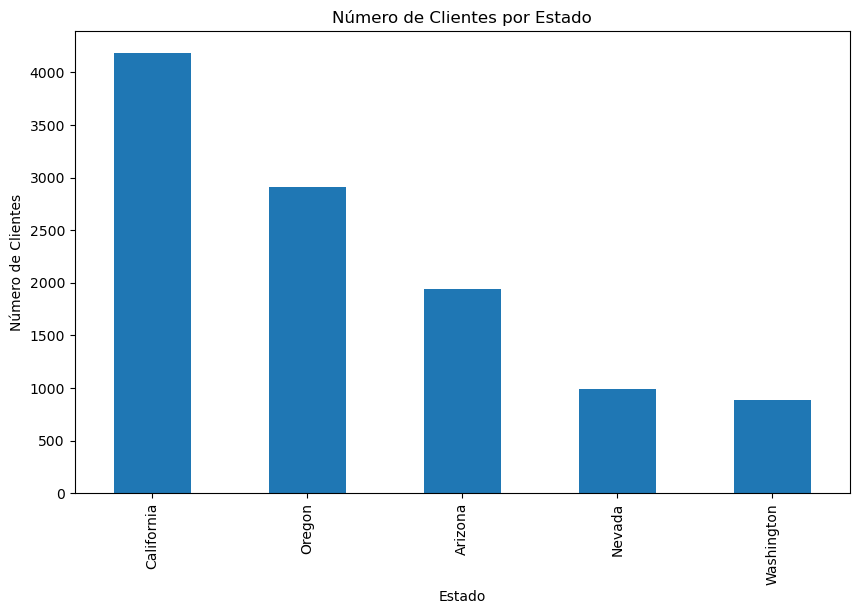

In [19]:
import matplotlib.pyplot as plt

clientes_por_estado.plot(kind='bar', figsize=(10,6))
plt.title('Número de Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Clientes')
plt.show()


In [20]:
# Contar el número de clientes por estado
clientes_por_estado = df['state'].value_counts()
print(clientes_por_estado)


state
California    4183
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64


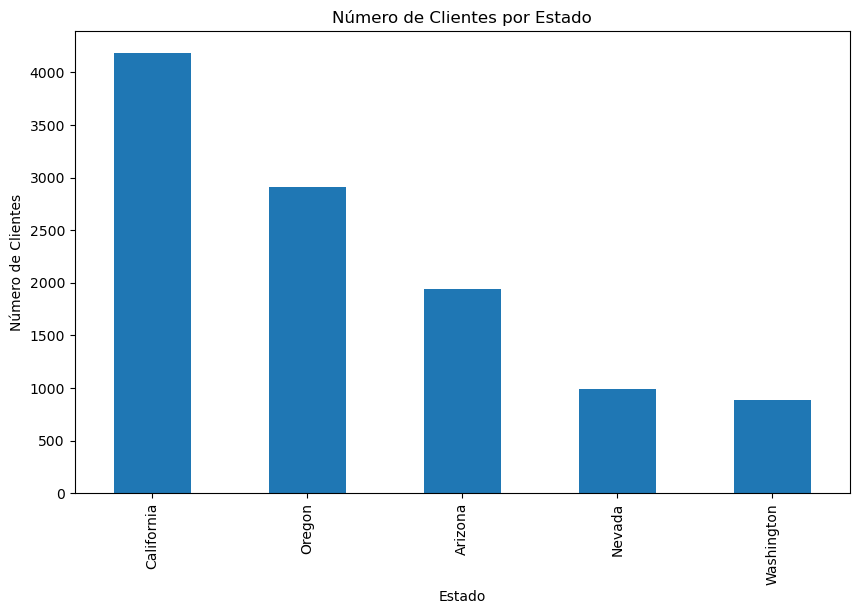

In [21]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar el número de clientes por estado
clientes_por_estado.plot(kind='bar', figsize=(10,6))
plt.title('Número de Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Clientes')
plt.show()


1. You work at the marketing department and you want to know which sales channel brought the most sales in terms of total revenue. Using pivot, create a summary table showing the total revenue for each sales channel (branch, call center, web, and mail).
Round the total revenue to 2 decimal points.  Analyze the resulting table to draw insights.

In [22]:
# Tabla dinámica: ingreso total por canal de ventas
pivot_ingresos = df.pivot_table(values='total_claim_amount',
                                 index='sales_channel',
                                 aggfunc='sum')

# Redondear a 2 decimales
pivot_ingresos = pivot_ingresos.round(2)

# Mostrar tabla ordenada
print(pivot_ingresos.sort_values(by='total_claim_amount', ascending=False))


               total_claim_amount
sales_channel                    
Agent                  1810226.82
Branch                 1301204.00
Call Center             926600.82
Web                     706600.04


2. Create a pivot table that shows the average customer lifetime value per gender and education level. Analyze the resulting table to draw insights.

In [23]:
# Tabla dinámica: promedio de customer lifetime value por género y educación
pivot_clv = df.pivot_table(values='customer_lifetime_value',
                           index='gender',
                           columns='education',
                           aggfunc='mean')

# Redondear a 2 decimales
pivot_clv = pivot_clv.round(2)

print(pivot_clv)


education  Bachelor  College   Doctor  High School or Below   Master
gender                                                              
F           7874.27  7748.82  7328.51               8675.22  8157.05
M           7703.60  8052.46  7415.33               8149.69  8168.83


## Bonus

You work at the customer service department and you want to know which months had the highest number of complaints by policy type category. Create a summary table showing the number of complaints by policy type and month.
Show it in a long format table.

*In data analysis, a long format table is a way of structuring data in which each observation or measurement is stored in a separate row of the table. The key characteristic of a long format table is that each column represents a single variable, and each row represents a single observation of that variable.*

*More information about long and wide format tables here: https://www.statology.org/long-vs-wide-data/*

In [24]:
# Convertir columna de fecha y extraer el mes
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df['month'] = df['effective_to_date'].dt.month


In [25]:
# Tabla resumen de quejas por tipo de póliza y mes
complaints_summary = df.pivot_table(values='number_of_open_complaints',
                                    index=['month', 'policy_type'],
                                    aggfunc='sum').reset_index()

print(complaints_summary)


   month     policy_type  number_of_open_complaints
0      1  Corporate Auto                 443.434952
1      1   Personal Auto                1727.605722
2      1    Special Auto                  87.074049
3      2  Corporate Auto                 385.208135
4      2   Personal Auto                1453.684441
5      2    Special Auto                  95.226817
